In [1]:
import pandas as pd
import csv
import os
import time
from collections import defaultdict
import numpy as np
import itertools
import db_structure
import networkx as nx
from imp import reload
import matplotlib.pyplot as plt
import utilities as u
%load_ext autoreload
%autoreload 2

In [7]:
DB = db_structure.DB('sample2')

In [ ]:
DB.assign_fk(table_1_name='employees', table_2_name='customers', column_1='employeeNumber', column_2='salesRepEmployeeNum')
DB.assign_fk(table_1_name='orders', table_2_name='customers', column_1='customerNum', column_2='customerNumber')
DB.assign_fk(table_1_name='products', table_2_name='productlines', column_1='productLine', column_2='ProductLine')

In [ ]:
DB.assign_fk(table_1_name='amz_book', table_2_name='book', column_1='book_id', column_2='id')
DB.assign_fk(table_1_name='amz_listing', table_2_name='purchases', column_1='purchase_id', column_2='id')
DB.assign_fk(table_1_name='amz_listing', table_2_name='book', column_1='book_id', column_2='id')
DB.assign_fk(table_1_name='amz_pricing_history', table_2_name='amz_listing', column_1='amz_listing_id', column_2='id')
DB.assign_fk(table_1_name='purchases', table_2_name='book', column_1='book_id', column_2='id')

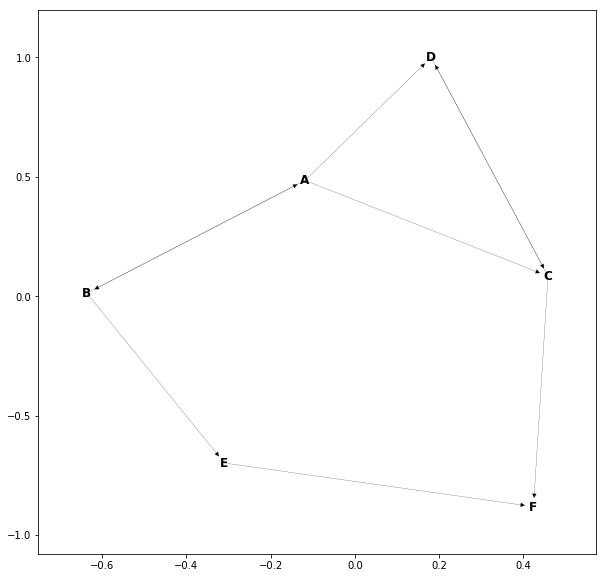

In [8]:
G = nx.DiGraph()
G.add_nodes_from(DB.tables.keys())
for current_table_name, current_table in DB.tables.items():
    for sibling in current_table.get_sibling_names():
        G.add_edge(current_table_name, sibling)
        G.add_edge(sibling, current_table_name)
    for child in current_table.get_children_names():
        G.add_edge(current_table_name, child)
plt.figure(figsize=(10,10))
#pos = nx.spring_layout(G)
#nx.set_node_attributes(G, pos, 'pos')
nx.draw_networkx(G, font_weight='bold', node_shape="None", width=0.2)
#A = nx.nx_agraph.to_agraph(G)
#H = nx.nx_agraph.from_agraph(A)
#nx.draw_spring(H, node_shape="None", with_labels=True, width=0.2)

In [28]:
DB.find_paths_multi_tables(['D', 'C', 'F'])

[['D', 'C', 'F'], ['C', 'D', 'C', 'F']]

In [23]:
DB.common_columns

{'col2': Column col2 in tables {A, D},
 'col6': Column col6 in tables {D, C},
 'col1': Column col1 in tables {A, C},
 'col5': Column col5 in tables {C, F},
 'col4': Column col4 in tables {B, E},
 'col7': Column col7 in tables {E, F},
 'col3': Column col3 in tables {A, B}}

In [24]:
DB.tables['A'].columns

{'col1': Column col1 in tables {A, C},
 'col2': Column col2 in tables {A, D},
 'col3': Column col3 in tables {A, B}}

In [25]:
DB.tables['D'].columns

{'col2': Column col2 in tables {A, D}, 'col6': Column col6 in tables {D, C}}

In [26]:
DB.tables['C'].columns

{'col1': Column col1 in tables {A, C},
 'col5': Column col5 in tables {C, F},
 'col6': Column col6 in tables {D, C}}

In [27]:
DB.tables['F'].columns

{'col5': Column col5 in tables {C, F},
 'col7': Column col7 in tables {E, F},
 'col8': Column col8 in tables {F}}

In [33]:
colx = DB.tables['A'].columns['col1']
coly = DB.tables['B'].columns['col4']
colz = DB.tables['F'].columns['col8']
DB.find_paths_multi_columns([colx, coly, colz])

[['A', 'B', 'E', 'F'],
 ['A', 'B', 'A', 'D', 'C', 'F'],
 ['A', 'B', 'A', 'C', 'F'],
 ['B', 'A', 'D', 'C', 'F'],
 ['B', 'A', 'C', 'F'],
 ['B', 'A', 'B', 'E', 'F']]